# Titanic Dataset EDA - Train + Short Test Comparison


In [1]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [3]:
# 2. Load Data
train = pd.read_csv("C:/Users/vpriy/Downloads/titanic/train.csv")
test = pd.read_csv("C:/Users/vpriy/Downloads/titanic/test.csv")

In [4]:
# 3. Column Descriptions
# ------------------------------
"""
PassengerId: Unique ID for each passenger.
Survived: Target variable (0 = No, 1 = Yes).
Pclass: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).
Name: Passenger’s name (contains title info).
Sex: Gender of passenger.
Age: Passenger’s age (in years).
SibSp: Number of siblings/spouses aboard.
Parch: Number of parents/children aboard.
Ticket: Ticket number.
Fare: Ticket price.
Cabin: Cabin number (many missing values).
Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
"""


'\nPassengerId: Unique ID for each passenger.\nSurvived: Target variable (0 = No, 1 = Yes).\nPclass: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).\nName: Passenger’s name (contains title info).\nSex: Gender of passenger.\nAge: Passenger’s age (in years).\nSibSp: Number of siblings/spouses aboard.\nParch: Number of parents/children aboard.\nTicket: Ticket number.\nFare: Ticket price.\nCabin: Cabin number (many missing values).\nEmbarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).\n'

In [8]:
# 4. Basic Info
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [9]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [10]:
print(train.describe(include="all"))

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

In [11]:
# 5. Missing Values Analysis
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


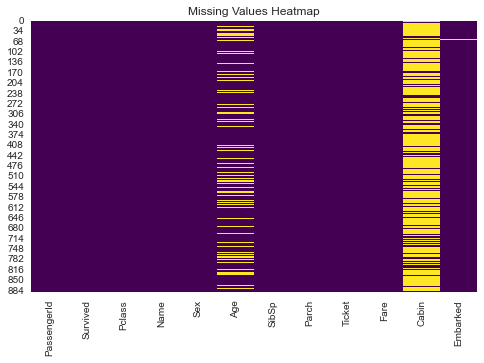

In [12]:
sns.heatmap(train.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

Observation : Age and Cabin have high missing values, Embarked has few

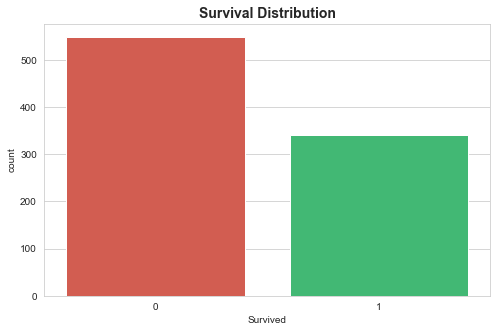

0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [39]:
# Target Variable Distribution with custom colors
sns.countplot(
    x="Survived",
    data=train,
    palette={0: "#E74C3C", 1: "#2ECC71"}  # Red & Green
)
plt.title("Survival Distribution", fontsize=14, fontweight="bold")
plt.show()

# Percentage distribution
print(train["Survived"].value_counts(normalize=True))

Observation: Around 38% of people survived and remaining 62% people are dead

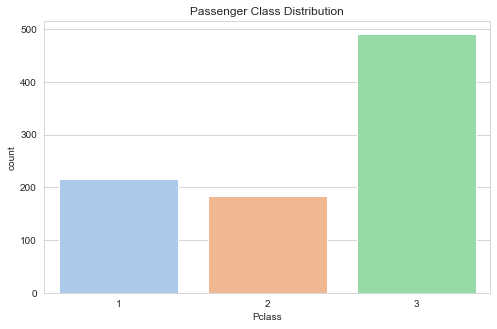

In [14]:
#7.Univariate Analysis
# Passenger Class
sns.countplot(x="Pclass", data=train, palette="pastel")
plt.title("Passenger Class Distribution")
plt.show()

Observation: Most passengers were in 3rd class

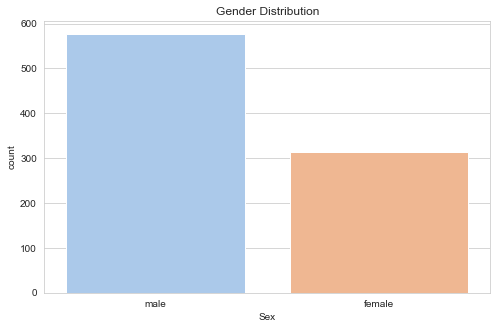

In [15]:
# Gender
sns.countplot(x="Sex", data=train, palette="pastel")
plt.title("Gender Distribution")
plt.show()

Observation: More male passengers than female

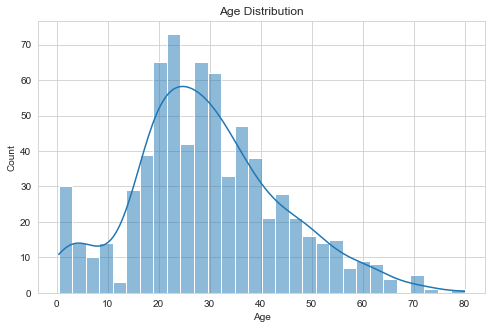

In [16]:
# Age Distribution - Histpgram
sns.histplot(train["Age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

Observation: Most passengers were between 20-40 years

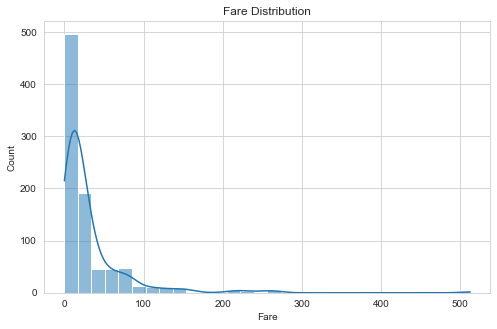

In [17]:
# Fare Distribution - Histogram
sns.histplot(train["Fare"], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

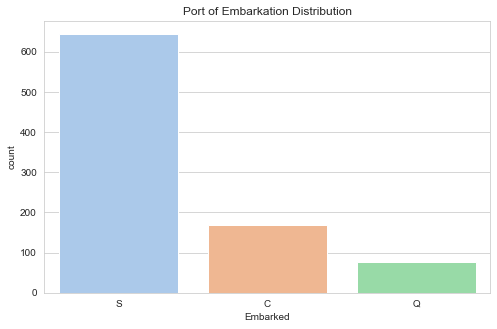

In [18]:
# Embarked
sns.countplot(x="Embarked", data=train, palette="pastel")
plt.title("Port of Embarkation Distribution")
plt.show()

Observation: Most passengers embarked from Southampton

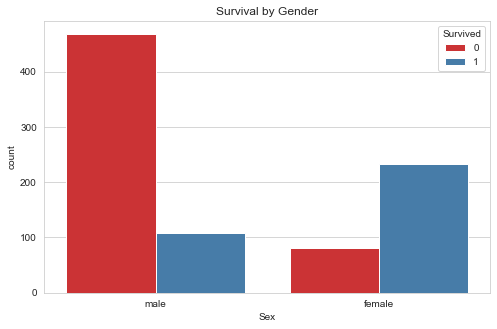

In [19]:
# 8. Bivariate Analysis
# Survival by Gender
sns.countplot(x="Sex", hue="Survived", data=train, palette="Set1")
plt.title("Survival by Gender")
plt.show()

Observation: Females had a much higher survival rate.

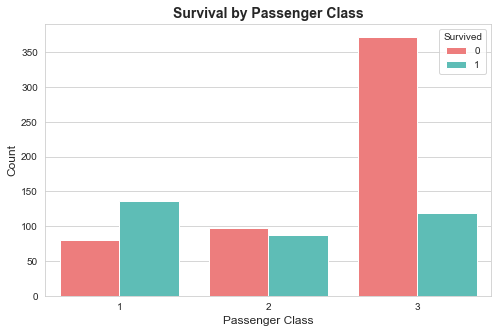

In [36]:
sns.countplot(
    x="Pclass",
    hue="Survived",
    data=train,
    palette={0: "#FF6B6B", 1: "#4ECDC4"}  # Red for non-survivors, teal for survivors
)
plt.title("Survival by Passenger Class", fontsize=14, fontweight="bold")
plt.xlabel("Passenger Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

Observation: 1st class passengers had higher survival, 2nd and 3rd class the lowest.

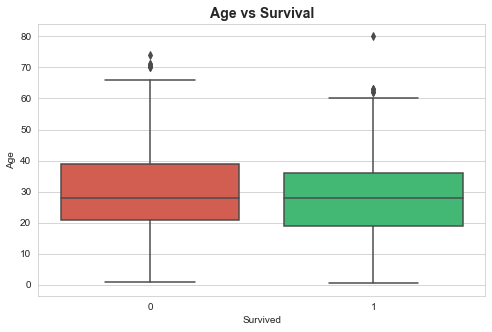

In [38]:
sns.boxplot(
    x="Survived",
    y="Age",
    data=train,
    palette={0: "#E74C3C", 1: "#2ECC71"}  # Red & Green
)
plt.title("Age vs Survival", fontsize=14, fontweight="bold")
plt.show()

Observation: Younger passengers had slightly better survival chances.


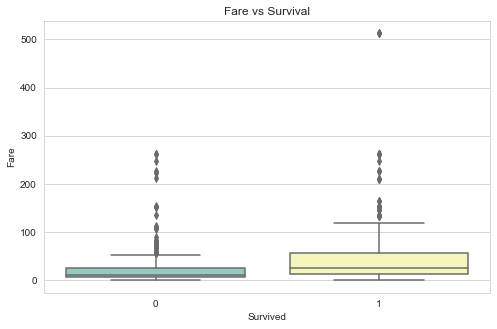

In [22]:
# Fare vs Survival-Boxplot
sns.boxplot(x="Survived", y="Fare", data=train, palette="Set3")
plt.title("Fare vs Survival")
plt.show()

Observation: Higher fare passengers were more likely to survive.

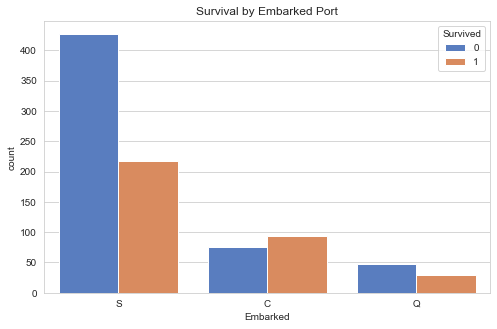

In [23]:
# Survival by Embarked
sns.countplot(x="Embarked", hue="Survived", data=train, palette="muted")
plt.title("Survival by Embarked Port")
plt.show()

 Observation: Passengers from S had higher survival rates.

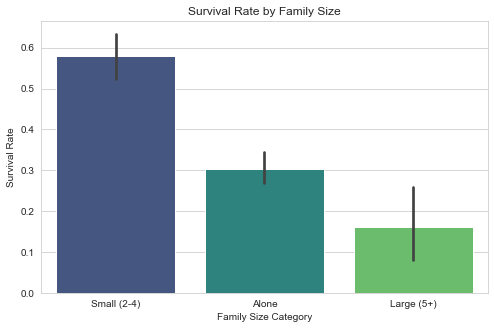

In [35]:
# Create family size column
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# Categorize family size
train['FamilyGroup'] = train['FamilySize'].apply(lambda x: 'Alone' if x == 1 
                                                 else 'Small (2-4)' if x <= 4 
                                                 else 'Large (5+)')

# Plot
sns.barplot(x='FamilyGroup', y='Survived', data=train, palette='viridis')
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.xlabel('Family Size Category')
plt.show()

Observation: Smaller family has more survival rate

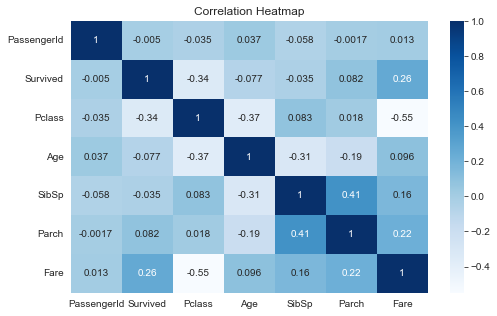

In [26]:
# 9. Correlation Heatmap
sns.heatmap(train.select_dtypes(include=["number"]).corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

* No extreme correlations close to 1 or -1 except PassengerId with itself (irrelevant).

* Most relationships are weak to moderate, suggesting survival depends on multiple factors, not just one strong predictor.

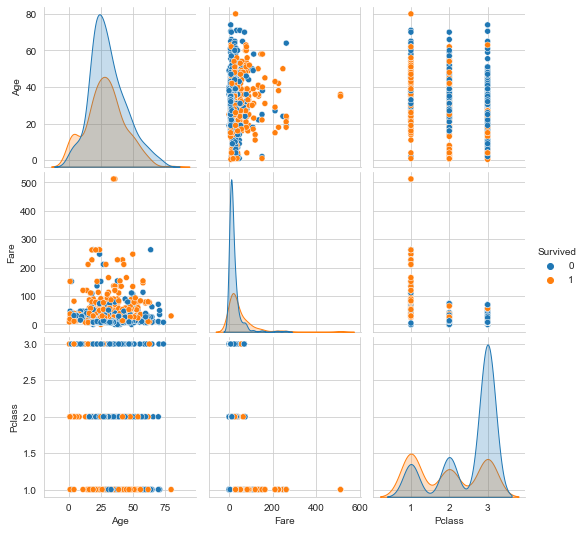

In [27]:
# 10. Pairplot - Scatter plot between age,fare,Pclass
sns.pairplot(train, hue="Survived", vars=["Age", "Fare", "Pclass"])
plt.show()

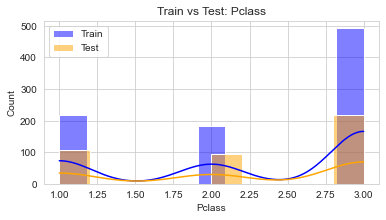

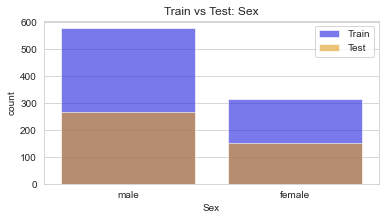

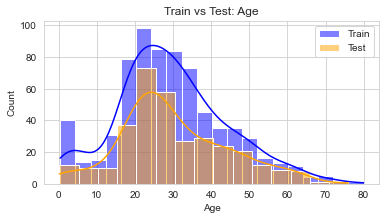

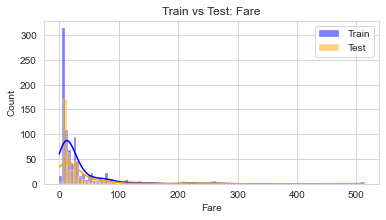

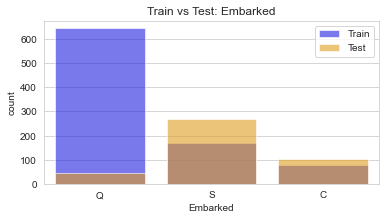

In [29]:
# 11. Train vs Test Comparison
compare_cols = ["Pclass", "Sex", "Age", "Fare", "Embarked"]
for col in compare_cols:
    plt.figure(figsize=(6, 3))
    if train[col].dtype == "object":
        sns.countplot(x=col, data=train, color="blue", alpha=0.6, label="Train")
        sns.countplot(x=col, data=test, color="orange", alpha=0.6, label="Test")
    else:
        sns.histplot(train[col].dropna(), color="blue", label="Train", kde=True)
        sns.histplot(test[col].dropna(), color="orange", label="Test", kde=True)
    plt.title(f"Train vs Test: {col}")
    plt.legend()
    plt.show()

From these Train vs Test distribution plots, the observations are:

* Pclass – The distribution is almost identical in train and test datasets, with the majority of passengers in 3rd class,   followed by 1st and then 2nd class.

* Sex – Both datasets have more male passengers than female, with similar proportions.

* Age – The age distribution is similar in both sets: peak between 20–30 years, tapering off towards older ages.

* Fare – Both datasets show most passengers paying lower fares (under $100), with a few high outliers.

* Embarked – In both datasets, most passengers embarked from Southampton (S), followed by Cherbourg (C), and then Queenstown (Q).

* Overall observation:
The train and test datasets have very similar feature distributions, meaning the test set is representative of the train set. This is good because models trained on the train set are likely to generalize well to the test set without suffering from distribution shift.

In [34]:
import pandas as pd
df = pd.read_csv("train.csv")   # Replace with your file name
df.to_csv("titanic_updated.csv", index=False)
